## Imports

In [1]:
import os
import time

import gym
import matplotlib.pyplot as plt
from tqdm import tqdm

from stachrl.agents import DQNAgent, DDQNAgent
from stachrl.utils import movingaverage

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Using TensorFlow backend.


## Shared parameters of all agents

In [2]:
episodes = 10000
timesteps = 500
exploration_rate_decay = 0.005
memory_size = 50000
update_interval = 50


env_name = 'CartPole-v0'
env = gym.make(env_name)
env._max_episode_steps = timesteps

## Training of the DQN Agent

In [3]:
agent = DQNAgent(
    name=env_name,
    state_shape=env.observation_space.shape,
    action_size=env.action_space.n,
    exploration_rate_decay=exploration_rate_decay,
    memory_size=memory_size,
    production=False,
    auto_save=False,
    auto_load=False
)

total_reward_history_dqn = []
iterator = tqdm(range(episodes))

for episode in iterator:
    iterator.set_postfix_str('Reward: {:.2f}, ε: {:.2f}'.format(
        movingaverage(total_reward_history_dqn, 50)[-1],
        agent.exploration_rate
    ))

    total_reward = 0
    state = env.reset()

    agent.before()
    for timestep in range(timesteps):
        action = agent.act(state)

        next_state, reward, done, info = env.step(action)
        reward = reward - abs(next_state[0])

        agent.remember(state, action, reward, next_state, done)

        state = next_state
        total_reward = total_reward + reward

        if done:
            total_reward_history_dqn.append(total_reward)
            break

    agent.after()

100%|██████████| 10000/10000 [08:18<00:00, 20.08it/s, Reward: 75.89, ε: 0.01]


## Training of the DDQN Agent

In [4]:
agent = DDQNAgent(
    name=env_name,
    state_shape=env.observation_space.shape,
    action_size=env.action_space.n,
    exploration_rate_decay=exploration_rate_decay,
    memory_size=memory_size,
    update_interval=update_interval,
    production=False,
    auto_save=False,
    auto_load=False
)

total_reward_history_ddqn = []
iterator = tqdm(range(episodes))

for episode in iterator:
    iterator.set_postfix_str('Reward: {:.2f}, ε: {:.2f}'.format(
        movingaverage(total_reward_history_ddqn, 50)[-1],
        agent.exploration_rate
    ))

    total_reward = 0
    state = env.reset()

    agent.before()
    for timestep in range(timesteps):
        action = agent.act(state)

        next_state, reward, done, info = env.step(action)
        reward = reward - abs(next_state[0])

        agent.remember(state, action, reward, next_state, done)

        state = next_state
        total_reward = total_reward + reward

        if done:
            total_reward_history_ddqn.append(total_reward)
            break

    agent.after()

100%|██████████| 10000/10000 [13:49<00:00, 16.08it/s, Reward: 91.04, ε: 0.01]


## Compare trainings

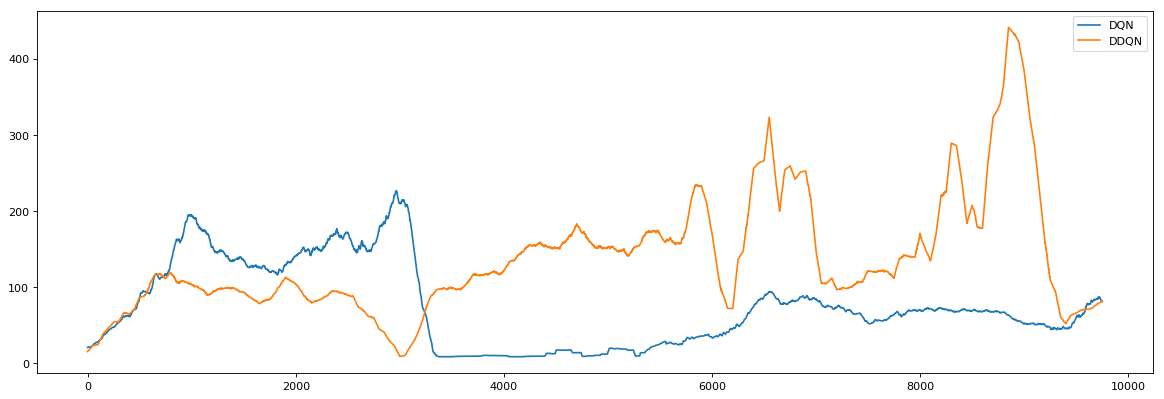

In [5]:
x_dqn = movingaverage(total_reward_history_dqn, 250)
x_ddqn = movingaverage(total_reward_history_ddqn, 250)

fig = plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')

line_dqn, = plt.plot(x_dqn, label='DQN')
line_ddqn, = plt.plot(x_ddqn, label='DDQN') 

plt.legend(handles=[
    line_dqn,
    line_ddqn
])

plt.show()